In [1]:
import pyspedas as sps, numpy as np, math
import pytplot as tplt

#Helper Function

def tplt_options(name, **kwargs):
    tplt.options(name, opt_dict=kwargs)

def tplotbroadcast(f, names, newname):
    datas = [tplt.get_data(n).y for n in names] 
    tplt.store_data(newname, data={'x': tplt.get_data(names[0]).times, 'y': [f(i, datas) for i in range(len(datas[0]))]})
    return newname

In [2]:
# Figure 1,  Characteristics of KH Waves as Observed by the MMS
# Summary Plot 1,  GSM frame
# 
# # Set time range of interest

date_time_start = '2015-10-16/05:00'
date_time_end = '2015-10-16/16:00'
hours=11

tr = [date_time_start, date_time_end]

# set details of data to be retrieved
probe = '2'
datatype = ['des-moms',  'dis-moms']
level = 'l2'
fgm_datarate = 'srvy'
datarate = 'fast'
coords='gsm'

In [30]:
# load FGM data
sps.mms.fgm(trange=tr,  probe=probe,  level=level,  data_rate=fgm_datarate,  time_clip=True,  get_fgm_ephemeris=True)

# load FPI data
sps.mms.fpi(trange=tr,  probe=probe,  datatype=datatype,  level = level,  data_rate=datarate,  time_clip=True)

# load EDP data
sps.mms.edp(trange=tr, probe=probe, level=level, time_clip=True)


28-Oct-23 22:32:55: Loading pydata\mms2\fgm\srvy\l2\2015\10\mms2_fgm_srvy_l2_20151016_v4.18.0.cdf
28-Oct-23 22:33:16: Time clip was applied to: mms2_fgm_b_gse_srvy_l2
28-Oct-23 22:33:20: Time clip was applied to: mms2_fgm_b_gsm_srvy_l2
28-Oct-23 22:33:25: Time clip was applied to: mms2_fgm_b_dmpa_srvy_l2
28-Oct-23 22:33:29: Time clip was applied to: mms2_fgm_b_bcs_srvy_l2
28-Oct-23 22:33:33: Time clip was applied to: mms2_fgm_flag_srvy_l2
28-Oct-23 22:33:33: Time clip was applied to: mms2_fgm_r_gse_srvy_l2
28-Oct-23 22:33:33: Time clip was applied to: mms2_fgm_r_gsm_srvy_l2
28-Oct-23 22:33:37: Time clip was applied to: mms2_fgm_hirange_srvy_l2
28-Oct-23 22:33:42: Time clip was applied to: mms2_fgm_bdeltahalf_srvy_l2
28-Oct-23 22:33:46: Time clip was applied to: mms2_fgm_stemp_srvy_l2
28-Oct-23 22:33:50: Time clip was applied to: mms2_fgm_etemp_srvy_l2
28-Oct-23 22:33:54: Time clip was applied to: mms2_fgm_mode_srvy_l2
28-Oct-23 22:33:55: Loaded variables:
28-Oct-23 22:33:55: Epoch
28-O

28-Oct-23 22:34:04: mms2_des_energyspectr_pz_fast
28-Oct-23 22:34:04: mms2_des_energyspectr_mz_fast
28-Oct-23 22:34:04: mms2_des_energyspectr_par_fast
28-Oct-23 22:34:04: mms2_des_energyspectr_anti_fast
28-Oct-23 22:34:04: mms2_des_energyspectr_perp_fast
28-Oct-23 22:34:04: mms2_des_energyspectr_omni_fast
28-Oct-23 22:34:04: mms2_des_numberdensity_fast
28-Oct-23 22:34:04: mms2_des_numberdensity_err_fast
28-Oct-23 22:34:04: mms2_des_densityextrapolation_low_fast
28-Oct-23 22:34:04: mms2_des_densityextrapolation_high_fast
28-Oct-23 22:34:04: mms2_des_bulkv_dbcs_fast
28-Oct-23 22:34:04: mms2_des_bulkv_spintone_dbcs_fast
28-Oct-23 22:34:04: mms2_des_bulkv_gse_fast
28-Oct-23 22:34:04: mms2_des_bulkv_spintone_gse_fast
28-Oct-23 22:34:04: mms2_des_bulkv_err_fast
28-Oct-23 22:34:04: mms2_des_prestensor_dbcs_fast
28-Oct-23 22:34:04: mms2_des_prestensor_gse_fast
28-Oct-23 22:34:04: mms2_des_prestensor_err_fast
28-Oct-23 22:34:04: mms2_des_temptensor_dbcs_fast
28-Oct-23 22:34:04: mms2_des_tempten

['mms2_edp_dce_gse_fast_l2',
 'mms2_edp_dce_dsl_fast_l2',
 'mms2_edp_dce_par_epar_fast_l2']

In [73]:
'''efield = 'efield'
epfield = 'epfield'
bgsm = 'mms'+probe+'_fgm_b_'+coords+'_srvy_l2'

sps.cotrans('mms2_edp_dce_gse_fast_l2', efield,  coord_in='gse',  coord_out=coords)
sps.cotrans('mms2_des_bulkv_gse_fast', 've',  coord_in='gse',  coord_out=coords)
sps.cotrans('mms2_dis_bulkv_gse_fast', 'vi',  coord_in='gse',  coord_out=coords)

ionNDens = 'mms2_dis_numberdensity_fast'
elecVel = 'mms2_des_bulkv_gse_fast'
'''

tplotbroadcast(lambda i, d: [np.cross(d[0][i][0:2], d[1][i][0:2])], ['vi', bgsm], 'ecross')
tplt.add('ecross', efield, new_tvar=epfield)

'epfield'

In [4]:
# Interpolate all necessary data to FGM cadence
sps.tinterpol('mms'+probe+'_dis_numberdensity_'+datarate,  'mms'+probe+'_fgm_b_'+coords+'_'+fgm_datarate+'_l2_btot',  newname='mms'+probe+'_dis_numberdensity_'+fgm_datarate)
sps.tinterpol('mms'+probe+'_des_numberdensity_'+datarate,  'mms'+probe+'_fgm_b_'+coords+'_'+fgm_datarate+'_l2_btot',  newname='mms'+probe+'_des_numberdensity_'+fgm_datarate)
sps.tinterpol('mms'+probe+'_dis_temppara_'+datarate,  'mms'+probe+'_fgm_b_'+coords+'_'+fgm_datarate+'_l2_btot',  newname='mms'+probe+'_dis_temppara_'+fgm_datarate)
sps.tinterpol('mms'+probe+'_dis_tempperp_'+datarate,  'mms'+probe+'_fgm_b_'+coords+'_'+fgm_datarate+'_l2_btot',  newname='mms'+probe+'_dis_tempperp_'+fgm_datarate)
sps.tinterpol('mms'+probe+'_des_temppara_'+datarate,  'mms'+probe+'_fgm_b_'+coords+'_'+fgm_datarate+'_l2_btot',  newname='mms'+probe+'_des_temppara_'+fgm_datarate)
sps.tinterpol('mms'+probe+'_des_tempperp_'+datarate,  'mms'+probe+'_fgm_b_'+coords+'_'+fgm_datarate+'_l2_btot',  newname='mms'+probe+'_des_tempperp_'+fgm_datarate)
sps.tinterpol('mms'+probe+'_edp_dce_'+coords+'_'+datarate+'_l2',  'mms'+probe+'_fgm_b_'+coords+'_'+fgm_datarate+'_l2_btot',  newname='mms'+probe+'_edp_dce_'+coords+'_'+fgm_datarate+'_l2')
sps.tinterpol('mms'+probe+'_dis_bulkv_gse_'+datarate,  'mms'+probe+'_fgm_b_'+coords+'_'+fgm_datarate+'_l2_btot',  newname='mms'+probe+'_dis_bulkv_gse_'+fgm_datarate)
sps.tinterpol('mms'+probe+'_des_bulkv_gse_'+datarate,  'mms'+probe+'_fgm_b_'+coords+'_'+fgm_datarate+'_l2_btot',  newname='mms'+probe+'_des_bulkv_gse_'+fgm_datarate)


# Rotate velocity data to GSM coordinates
sps.cotrans('mms'+probe+'_dis_bulkv_gse_'+fgm_datarate,  'mms'+probe+'_dis_bulkv_'+coords+'_'+fgm_datarate,  coord_in='gse',  coord_out=coords)

28-Oct-23 21:51:06: tinterpol (linear) was applied to: mms2_dis_numberdensity_srvy
28-Oct-23 21:51:06: tinterpol (linear) was applied to: mms2_des_numberdensity_srvy
28-Oct-23 21:51:07: tinterpol (linear) was applied to: mms2_dis_temppara_srvy
28-Oct-23 21:51:07: tinterpol (linear) was applied to: mms2_dis_tempperp_srvy
28-Oct-23 21:51:07: tinterpol (linear) was applied to: mms2_des_temppara_srvy
28-Oct-23 21:51:07: tinterpol (linear) was applied to: mms2_des_tempperp_srvy
28-Oct-23 21:51:07: tinterpol error: No pytplot names were provided.
28-Oct-23 21:51:07: tinterpol (linear) was applied to: mms2_dis_bulkv_gse_srvy
28-Oct-23 21:51:08: tinterpol (linear) was applied to: mms2_des_bulkv_gse_srvy
28-Oct-23 21:51:08: ['gse', 'gsm']
28-Oct-23 21:51:16: Running transformation: subgse2gsm
28-Oct-23 21:51:16: Output variable: mms2_dis_bulkv_gsm_srvy


1

In [5]:
# Calculate average temperatures
tplt.add('mms'+probe+'_dis_tempperp_'+fgm_datarate,  'mms'+probe+'_dis_tempperp_'+fgm_datarate,  new_tvar='mms'+probe+'_dis_2tperp_'+fgm_datarate)
tplt.add('mms'+probe+'_dis_temppara_'+fgm_datarate,  'mms'+probe+'_dis_2tperp_'+fgm_datarate,  new_tvar='mms'+probe+'_dis_tempavg_'+fgm_datarate)
tplotbroadcast(lambda i, d: d[0][i] / 3, ['mms'+probe+'_dis_tempavg_'+fgm_datarate], 'mms'+probe+'_dis_tempavg_'+fgm_datarate)

tplt.add('mms'+probe+'_des_tempperp_'+fgm_datarate,  'mms'+probe+'_des_tempperp_'+fgm_datarate,  new_tvar='mms'+probe+'_des_2tperp_'+fgm_datarate)
tplt.add('mms'+probe+'_des_temppara_'+fgm_datarate,  'mms'+probe+'_des_2tperp_'+fgm_datarate,  new_tvar='mms'+probe+'_des_tempavg_'+fgm_datarate)
ElecT = tplotbroadcast(lambda i, d: d[0][i] / 3, ['mms'+probe+'_des_tempavg_'+fgm_datarate], 'mms'+probe+'_des_tempavg_'+fgm_datarate)

tplt.divide('mms'+probe+'_dis_tempavg_'+fgm_datarate,  'mms'+probe+'_des_tempavg_'+fgm_datarate,  new_tvar='mms'+probe+'_tempratio_'+fgm_datarate)


#Average

"\ntplt.add('mms'+probe+'_dis_tempperp_'+fgm_datarate, 'mms'+probe+'_dis_tempperp_'+fgm_datarate, new_tvar='mms'+probe+'_dis_2tperp_'+fgm_datarate)\ntplt.add('mms'+probe+'_dis_temppara_'+fgm_datarate, 'mms'+probe+'_dis_2tperp_'+fgm_datarate, new_tvar='mms'+probe+'_dis_tempavg_'+fgm_datarate)\nIonT = tplotbroadcast(lambda i, d: d[0][i] / 3, ['mms'+probe+'_dis_tempavg_'+fgm_datarate], 'mms'+probe+'_dis_tempavg_'+fgm_datarate)\ntplt.options(IonT, opt_dict={'ytitle': 'Ion Temperature', 'ysubtitle': '[eV]'})\n\n\ntplt.add('mms'+probe+'_des_tempperp_'+fgm_datarate, 'mms'+probe+'_des_tempperp_'+fgm_datarate, new_tvar='mms'+probe+'_des_2tperp_'+fgm_datarate)\ntplt.add('mms'+probe+'_des_temppara_'+fgm_datarate, 'mms'+probe+'_des_2tperp_'+fgm_datarate, new_tvar='mms'+probe+'_des_tempavg_'+fgm_datarate)\nElecT = tplotbroadcast(lambda i, d: d[0][i] / 3, ['mms'+probe+'_des_tempavg_'+fgm_datarate], 'mms'+probe+'_des_tempavg_'+fgm_datarate)\ntplt.options(ElecT, opt_dict={'ytitle': 'Electron Temperatu

In [6]:
# Calculate magnetic,  plasma,  total pressures
tplt.multiply('mms'+probe+'_dis_tempavg_'+fgm_datarate,  'mms'+probe+'_dis_numberdensity_'+fgm_datarate, new_tvar='mms'+probe+'_ion_plasma_pressure_'+fgm_datarate)
tplotbroadcast(lambda i, d: d[0][i] * math.e*10.**15, ['mms'+probe+'_ion_plasma_pressure_'+fgm_datarate], 'mms'+probe+'_ion_plasma_pressure_'+fgm_datarate)

tplt.multiply('mms'+probe+'_des_tempavg_'+fgm_datarate,  'mms'+probe+'_des_numberdensity_'+fgm_datarate, new_tvar='mms'+probe+'_electron_plasma_pressure_'+fgm_datarate)
tplotbroadcast(lambda i, d: d[0][i] * math.e*10.**15, ['mms'+probe+'_electron_plasma_pressure_'+fgm_datarate], 'mms'+probe+'_electron_plasma_pressure_'+fgm_datarate)

tplt.multiply('mms'+probe+'_fgm_b_'+coords+'_'+fgm_datarate+'_l2_btot',  'mms'+probe+'_fgm_b_'+coords+'_'+fgm_datarate+'_l2_btot',  new_tvar='mms'+probe+'_magnetic_pressure_'+fgm_datarate)
tplotbroadcast(lambda i, d: d[0][i] * 10**-9/(2* 4*math.pi*10**-7), ['mms'+probe+'_magnetic_pressure_'+fgm_datarate], 'mms'+probe+'_magnetic_pressure_'+fgm_datarate)

tplt.add('mms'+probe+'_ion_plasma_pressure_'+fgm_datarate,  'mms'+probe+'_electron_plasma_pressure_'+fgm_datarate,  new_tvar='mms'+probe+'_plasma_pressure_'+fgm_datarate)
tplt.add('mms'+probe+'_plasma_pressure_'+fgm_datarate,  'mms'+probe+'_magnetic_pressure_'+fgm_datarate,  new_tvar='mms'+probe+'_total_pressure_'+fgm_datarate)

tplt.store_data('mms'+probe+'_pressures_'+fgm_datarate,  data=['mms'+probe+'_plasma_pressure_'+fgm_datarate, 'mms'+probe+'_magnetic_pressure_'+fgm_datarate, 'mms'+probe+'_total_pressure_'+fgm_datarate])

# Calculate ion and electron plasma betas
tplt.divide('mms'+probe+'_ion_plasma_pressure_'+fgm_datarate,  'mms'+probe+'_magnetic_pressure_'+fgm_datarate,  new_tvar='mms'+probe+'_ion_beta_'+fgm_datarate)
tplt.divide('mms'+probe+'_electron_plasma_pressure_'+fgm_datarate,  'mms'+probe+'_magnetic_pressure_'+fgm_datarate,  new_tvar='mms'+probe+'_electron_beta_'+fgm_datarate)

# Convert location data to RE
tplotbroadcast(lambda i, d: d[0][i] / 6371, ['mms'+probe+'_fgm_r_'+coords+'_'+fgm_datarate+'_l2'], 'mms'+probe+'_fgm_RE_'+coords+'_'+fgm_datarate)
tplt.split_vec('mms'+probe+'_fgm_RE_'+coords+'_'+fgm_datarate)
tplt_options('mms'+probe+'_fgm_RE_'+coords+'_'+fgm_datarate+'_0',  ytitle = 'Xgsm')
tplt_options('mms'+probe+'_fgm_RE_'+coords+'_'+fgm_datarate+'_1',  ytitle = 'Ygsm')
tplt_options('mms'+probe+'_fgm_RE_'+coords+'_'+fgm_datarate+'_2',  ytitle = 'Zgsm')

"\n#Calculate magnetic, plasma, total pressures\ntplt.multiply('mms'+probe+'_dis_tempavg_'+fgm_datarate, 'mms'+probe+'_dis_numberdensity_'+fgm_datarate, new_tvar='mms'+probe+'_ion_plasma_pressure_'+fgm_datarate)\ntplotbroadcast(lambda i, d: d[0][i] * math.e*10.**15, ['mms'+probe+'_ion_plasma_pressure_'+fgm_datarate], 'mms'+probe+'_ion_plasma_pressure_'+fgm_datarate)\n\ntplt.multiply('mms'+probe+'_des_tempavg_'+fgm_datarate, 'mms'+probe+'_des_numberdensity_'+fgm_datarate, new_tvar='mms'+probe+'_electron_plasma_pressure_'+fgm_datarate)\ntplotbroadcast(lambda i, d: d[0][i] * math.e*10.**15, ['mms'+probe+'_electron_plasma_pressure_'+fgm_datarate], 'mms'+probe+'_electron_plasma_pressure_'+fgm_datarate)\n\ntplt.multiply('mms'+probe+'_fgm_b_'+coords+'_'+fgm_datarate+'_l2_btot', 'mms'+probe+'_fgm_b_'+coords+'_'+fgm_datarate+'_l2_btot', new_tvar='mms'+probe+'_magnetic_pressure_'+fgm_datarate)\ntplotbroadcast(lambda i, d: d[0][i] * 10**-9/(2* 4*math.pi*10**-7), ['mms'+probe+'_magnetic_pressure_'

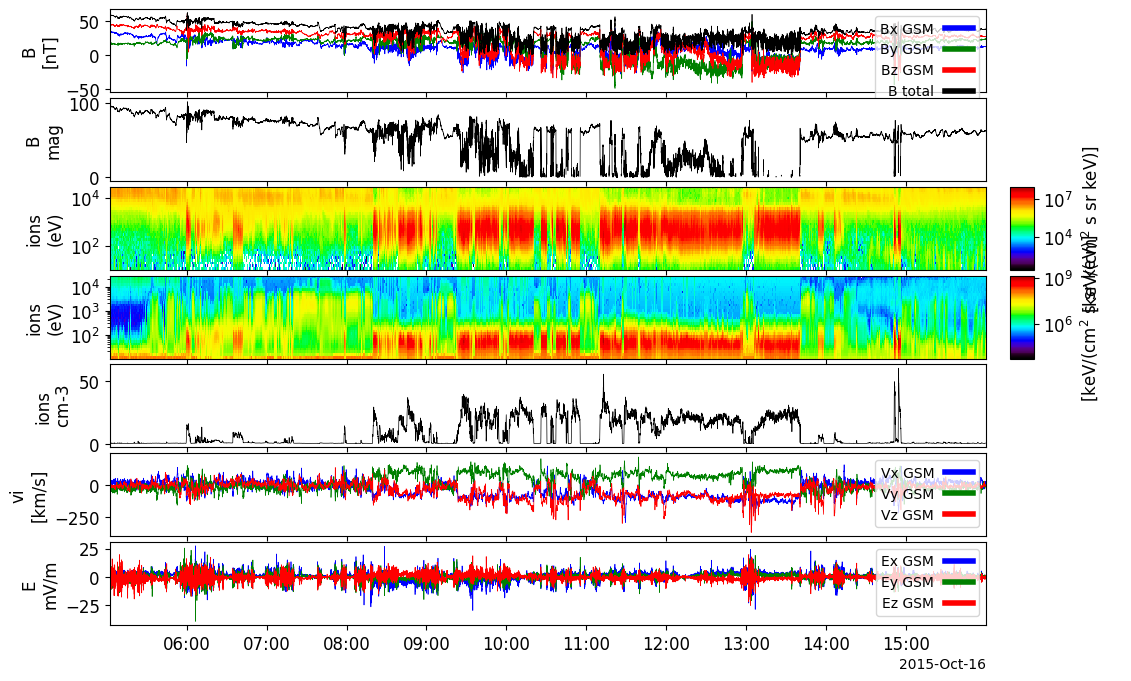

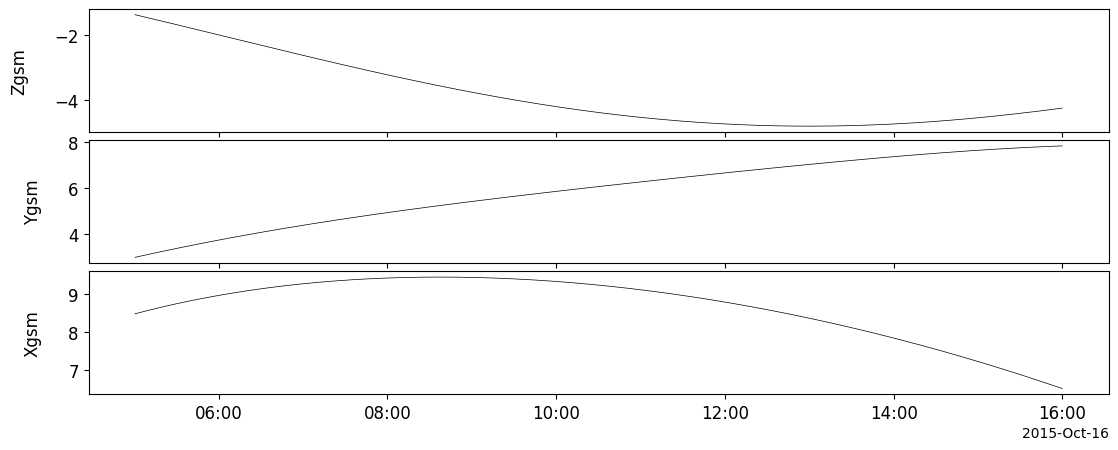

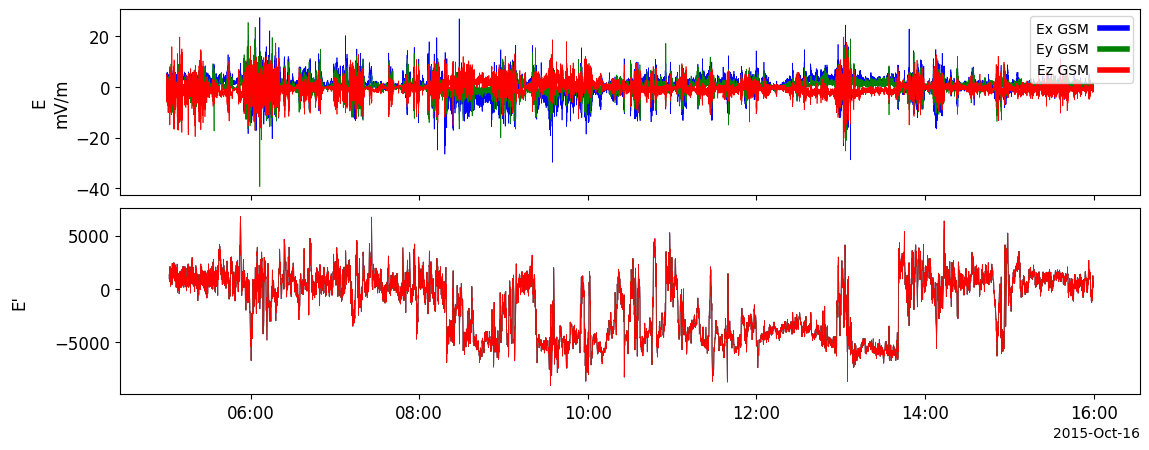

In [75]:
Ionspec = 'mms'+probe+'_dis_energyspectr_omni_'+datarate
BGSM = 'mms'+probe+'_fgm_b_'+coords+'_srvy_l2'
VGSM = 'mms'+probe+'_dis_bulkv_'+coords+'_'+fgm_datarate
IonT = 'mms'+probe+'_dis_tempavg_'+fgm_datarate
ElecT = 'mms'+probe+'_des_tempavg_'+fgm_datarate
IonN = 'mms'+probe+'_dis_numberdensity_'+fgm_datarate
ElecN = 'mms'+probe+'_des_numberdensity_'+fgm_datarate
IETRat = 'mms'+probe+'_tempratio_'+fgm_datarate
Pres = 'mms'+probe+'_pressures_'+fgm_datarate
IonB = 'mms'+probe+'_ion_beta_'+fgm_datarate
ElecB = 'mms'+probe+'_electron_beta_'+fgm_datarate
bmag = 'mms2_fgm_b_gsm_srvy_l2_btot'
ionE = 'mms2_dis_energyspectr_omni_fast'
elecE = 'mms2_des_energyspectr_omni_fast'
ionV = 'vi'

tplt_options(Ionspec,  ytitle = 'Omnidirectional Ion Energy')
tplt_options(BGSM,  ytitle = 'B')
tplt_options(BGSM,  ysubtitle = '[nT]')
tplt_options(bmag,  ytitle = 'B')
tplt_options(bmag,  ysubtitle = 'mag')
tplt_options(VGSM,  ytitle = 'Ion Velocity GSM')
tplt_options(VGSM,  ysubtitle = '[kms=True]')
tplt_options(IonT,  ytitle = 'Ion Temperature')
tplt_options(IonT,  ysubtitle = '[eV]')
tplt_options(IonN,  ytitle='Ion Density')
tplt_options(IonN,  ysubtitle = '[cc=True]')
tplt_options(IonN,  ylog=1)
tplt_options(ElecT,  ytitle = 'Electron Temperature')
tplt_options(ElecT,  ysubtitle = '[eV]')
tplt_options(ElecN,  ytitle = 'Electron Density')
tplt_options(ElecN,  ysubtitle = '[cc=True]')
tplt_options(ElecN,  ylog=1)
tplt_options(IETRat,  ytitle = 'IonElectron=True Temp Ratio')
tplt_options(Pres,  ytitle = 'Total Pressure')
tplt_options(Pres,  ysubtitle = '[nPa]')
tplt_options(IonB,  ytitle = 'Ion Plasma Beta')
tplt_options(ElecB,  ytitle = 'Electron Plasma Beta')

tplt_options(BGSM,  labflag=1)
tplt_options(VGSM,  labflag=1)
tplt_options(IonN,  labflag=3,  labpos=[0])
tplt_options(IonT,  labflag=3,  labpos=[1])
tplt_options(ElecN,  labflag=3,  labpos=[4])


tplt_options(ionE,  ytitle = 'ions')
tplt_options(ionE,  ysubtitle = '(eV)')
tplt_options(elecE,  ytitle = 'ions')
tplt_options(elecE,  ysubtitle = '(eV)')
tplt_options(ionV,  ytitle = 'vi')

tplt_options(ionNDens,  ytitle = 'ions')
tplt_options(ionNDens,  ysubtitle = 'cm^-3')

tplt_options(efield,  ytitle = 'E')
tplt_options(efield,  ysubtitle = 'mV/m')
tplt_options(epfield,  ytitle = 'E\'')

tplt.tplot([BGSM, bmag, ionE, elecE, ionNDens, ionV, efield], combine_axes=True)

tplt.tplot(['mms'+probe+'_fgm_RE_'+coords+'_'+fgm_datarate+'_2', 'mms'+probe+'_fgm_RE_'+coords+'_'+fgm_datarate+'_1', 'mms'+probe+'_fgm_RE_'+coords+'_'+fgm_datarate+'_0'])

tplt.tplot([efield, epfield])
